# Imports

In [1]:
using DataFrames
using CSV
using MLJ
using Plots
using StatsBase

include("../../lib.jl")

ENV["LINES"]=30;

# Dataset

In [2]:
data = CSV.read("./data.csv")

,1,2,3,4,5,6,7,8,9,10,11
,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64
1,3.919,2.6909,0,0,0,0,0,31.4,2,0,0
2,4.17,2.1144,0,0,0,0,0,30.8,1,1,0
3,3.932,3.2512,0,0,0,0,0,26.7,2,4,0
4,3.0,2.7098,0,0,0,0,0,20.0,0,2,0
5,4.236,3.3944,0,0,0,0,0,29.4,2,4,0
6,4.236,3.4286,0,0,0,0,0,28.6,2,4,0
7,5.0,5.0476,1,0,0,0,0,11.1,0,3,0
8,4.525,3.8301,0,0,0,0,0,31.6,3,2,0
9,4.596,3.0777,0,0,0,0,2,44.4,2,0,0


In [3]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,1,4.78264,2.0,4.828,6.496,,,Float64
2,2,3.06951,0.8039,3.0463,9.1775,,,Float64
3,3,0.716588,0,0.0,12,,,Int64
4,4,0.042654,0,0.0,3,,,Int64
5,5,0.980095,0,0.0,36,,,Int64
6,6,0.290047,0,0.0,13,,,Int64
7,7,1.64645,0,1.0,18,,,Int64
8,8,37.0556,0.0,37.5,60.7,,,Float64
9,9,1.3763,0,1.0,24,,,Int64


Look at class labels to see if dataset is imbalanced

In [4]:
label_counts = countmap(data[:(Class)])

Dict{String,Int64} with 2 entries:
  "RB"  => 356
  "NRB" => 699

In [5]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

2-element Array{Float64,1}:
 0.33744075829383885
 0.6625592417061611

Get data ready for training

In [6]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ 1       │ Float64                         │ Continuous    │
│ 2       │ Float64                         │ Continuous    │
│ 3       │ Int64                           │ Count         │
│ 4       │ Int64                           │ Count         │
│ 5       │ Int64                           │ Count         │
│ 6       │ Int64                           │ Count         │
│ 7       │ Int64                           │ Count         │
│ 8       │ Float64                         │ Continuous    │
│ 9       │ Int64                           │ Count         │
│ 10      │ Int64                           │ Count         │
│ 11      │ Int64                           │ Count         │
│ 12      │ Float64                         │ Continuous    │
│ 13      │ Float64                         │ Continuous    │
│ 14    

In [7]:
y, X = unpack(data, ==(:Class), colname->true)

(CategoricalValue{String,UInt32}["RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB"  …  "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB"], 1055×41 DataFrame. Omitted printing of 33 columns
│ Row  │ 1       │ 2       │ 3     │ 4     │ 5     │ 6     │ 7     │ 8       │
│      │ Float64 │ Float64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Float64 │
├──────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┼─────────┤
│ 1    │ 3.919   │ 2.6909  │ 0     │ 0     │ 0     │ 0     │ 0     │ 31.4    │
│ 2    │ 4.17    │ 2.1144  │ 0     │ 0     │ 0     │ 0     │ 0     │ 30.8    │
│ 3    │ 3.932   │ 3.2512  │ 0     │ 0     │ 0     │ 0     │ 0     │ 26.7    │
│ 4    │ 3.0     │ 2.7098  │ 0     │ 0     │ 0     │ 0     │ 0     │ 20.0    │
│ 5    │ 4.236   │ 3.3944  │ 0     │ 0     │ 0     │ 0     │ 0     │ 29.4    │
│ 6    │ 4.236   │ 3.4286  │ 0     │ 0     │ 0     │ 0     │ 0     │ 28.6    │
│ 7    │ 5.0     │ 5.0476  │ 1     │ 0     │ 0     │ 0     │ 0     │ 11.

Partition train and test data accoring to class labels

In [8]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=123, stratify=values(data[:Class])) # gives 70:30 split

([465, 562, 278, 619, 161, 972, 782, 321, 537, 760  …  12, 913, 471, 13, 1006, 802, 112, 840, 744, 261], [196, 586, 245, 77, 1028, 432, 215, 987, 137, 411  …  975, 610, 886, 848, 731, 1024, 805, 500, 659, 415])

In [9]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

2-element Array{Float64,1}:
 0.33739837398373984
 0.6626016260162602

In [10]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

2-element Array{Float64,1}:
 0.33753943217665616
 0.6624605678233438

In [42]:
standardizer = Standardizer()
stand = machine(standardizer, X[train,:]) #only want to standardize on training distribution
fit!(stand)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @258.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [43]:
models(matching(X,y))

6-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_name = MLJModels, ... )
 (name = RandomForestClassifier, package_name = DecisionTree, ... )
 (name = RandomForestClassifier, package_name = ScikitLearn, ... )

In [71]:
@load AdaBoostClassifier verbosity=2

import MLJScikitLearnInterface ✔
import MLJScikitLearnInterface ✔


┌ Info: Loading into module "Main": 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/mUBFt/src/loading.jl:70
┌ Warning: New model type being bound to `AdaBoostClassifier3` to avoid conflict with an existing name. 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/mUBFt/src/loading.jl:78


AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 50,
    learning_rate = 1.0,
    algorithm = "SAMME.R",
    random_state = nothing) @227

### Boosting
* Implement or steal a boosted version of your decision trees. 
* As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.

**Chooses the hardest examples** talk about in write-up

In [78]:
boost_model = AdaBoostClassifier(random_state=123)

AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 50,
    learning_rate = 1.0,
    algorithm = "SAMME.R",
    random_state = 123) @490

In [79]:
boost_mach = machine(boost_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @490`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{AdaBoostClassifier} @623 trained 0 times.
  args: 
    1:	Source @145 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @328 ⏎ `AbstractArray{Multiclass{2},1}`


In [80]:
fit!(boost_mach, rows=train, verbosity=2)

┌ Info: Training Machine{AdaBoostClassifier} @623.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{AdaBoostClassifier} @623 trained 1 time.
  args: 
    1:	Source @145 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @328 ⏎ `AbstractArray{Multiclass{2},1}`


In [81]:
boost_acc = evaluate!(boost_mach, resampling=CV(shuffle=true), measure=[cross_entropy, acc], 
                      verbosity=1, check_measure=false)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                 │
├───────────────┼───────────────┼────────────────────────────────────────────┤
│ cross_entropy │ 0.632         │ [0.633, 0.613, 0.627, 0.644, 0.651, 0.625] │
│ acc           │ 0.853         │ [0.92, 0.847, 0.818, 0.841, 0.858, 0.834]  │
└───────────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [[[0.687, 0.676, ..., 0.354], [0.686, 0.683, ..., 0.352], [0.641, 0.721, ..., 0.652], [0.7, 0.691, ..., 0.64], [0.655, 0.623, ..., 0.691], [0.678, 0.637, ..., 0.635]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [82]:
# evaluate!(boost_mach, resampling=CV(shuffle=true), measure=[tnr,tpr,fnr,fpr], verbosity=1, operation=predict_mode)

In [83]:
fitted_params(boost_mach);

### GridSearch 
number of estimators vs learning rate

In [208]:
param1 = :learning_rate
param2 = :n_estimators

# r1 = range(boost_model, param1, lower=5*10^-1.5, upper=0.6, scale=:linear)
# r2 = range(boost_model, param2, lower=1, upper=5, scale=:linear)
r1 = range(boost_model, param1, lower=0.45, upper=0.65, scale=:linear)
r2 = range(boost_model, param2, lower=110, upper=155, scale=:linear)

MLJBase.NumericRange(Int64, :n_estimators, ... )

In [209]:
self_tuning_boost_model = TunedModel(model=boost_model,
                                    tuning=Grid(goal=250),
                                    resampling=CV(), 
                                    measure=misclassification_rate,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2],
                                    operation=predict_mode)

ProbabilisticTunedModel(
    model = AdaBoostClassifier(
            base_estimator = nothing,
            n_estimators = 50,
            learning_rate = 1.0,
            algorithm = "SAMME.R",
            random_state = 123),
    tuning = Grid(
            goal = 250,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 6,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = misclassification_rate(),
    weights = nothing,
    operation = MLJModelInterface.predict_mode,
    range = MLJBase.NumericRange{T,MLJBase.Bounded,Symbol} where T[NumericRange{Float64,…} @074, NumericRange{Int64,…} @143],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPUThreads{Int64}(1),
    acceleration_resampling = CPU1{Nothing}(nothing),
    check_measure = true) @500

In [210]:
self_tuning_boost = machine(self_tuning_boost_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticTunedModel{Grid,…} @500`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{ProbabilisticTunedModel{Grid,…}} @575 trained 0 times.
  args: 
    1:	Source @704 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @737 ⏎ `AbstractArray{Multiclass{2},1}`


In [211]:
z = fit!(self_tuning_boost, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @575.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 256 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{CV,…} @048`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @219`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1}

Evaluating over 256 metamodels:   6%[=>                       ]  ETA: 0:06:28┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @124`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:   7%[=>                       ]  ETA: 0:06:29┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @883`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:   7%[=>                       ]  ETA: 0:06:3

Evaluating over 256 metamodels:  13%[===>                     ]  ETA: 0:06:04┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @898`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  13%[===>                     ]  ETA: 0:06:04┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @188`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  14%[===>                     ]  ETA: 0:06:0

Evaluating over 256 metamodels:  20%[====>                    ]  ETA: 0:05:33┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @978`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  20%[====>                    ]  ETA: 0:05:31┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @435`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  20%[=====>                   ]  ETA: 0:05:3

Evaluating over 256 metamodels:  26%[======>                  ]  ETA: 0:05:01┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @870`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  27%[======>                  ]  ETA: 0:05:00┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @990`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  27%[======>                  ]  ETA: 0:04:5

Evaluating over 256 metamodels:  33%[========>                ]  ETA: 0:04:37┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @452`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  33%[========>                ]  ETA: 0:04:36┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @935`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  34%[========>                ]  ETA: 0:04:3

Evaluating over 256 metamodels:  39%[=========>               ]  ETA: 0:04:12┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @889`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  40%[=========>               ]  ETA: 0:04:11┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @375`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  40%[==========>              ]  ETA: 0:04:0

Evaluating over 256 metamodels:  46%[===========>             ]  ETA: 0:03:43┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @708`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  46%[===========>             ]  ETA: 0:03:41┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @386`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  47%[===========>             ]  ETA: 0:03:4

Evaluating over 256 metamodels:  53%[=============>           ]  ETA: 0:03:15┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @268`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  53%[=============>           ]  ETA: 0:03:13┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @180`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  54%[=============>           ]  ETA: 0:03:1

Evaluating over 256 metamodels:  59%[==============>          ]  ETA: 0:02:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @809`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  60%[==============>          ]  ETA: 0:02:47┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @439`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  60%[===============>         ]  ETA: 0:02:4

Evaluating over 256 metamodels:  66%[================>        ]  ETA: 0:02:21┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @850`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  66%[================>        ]  ETA: 0:02:20┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @757`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  67%[================>        ]  ETA: 0:02:1

Evaluating over 256 metamodels:  73%[==================>      ]  ETA: 0:01:54┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @695`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  73%[==================>      ]  ETA: 0:01:52┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @768`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  73%[==================>      ]  ETA: 0:01:5

Evaluating over 256 metamodels:  79%[===================>     ]  ETA: 0:01:27┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @950`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  80%[===================>     ]  ETA: 0:01:25┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @994`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  80%[====================>    ]  ETA: 0:01:2

Evaluating over 256 metamodels:  86%[=====================>   ]  ETA: 0:00:59┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @065`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  86%[=====================>   ]  ETA: 0:00:57┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @647`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  87%[=====================>   ]  ETA: 0:00:5

Evaluating over 256 metamodels:  93%[=======================> ]  ETA: 0:00:31┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @491`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  93%[=======================> ]  ETA: 0:00:29┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @674`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels:  93%[=======================> ]  ETA: 0:00:2

Evaluating over 256 metamodels:  99%[========================>]  ETA: 0:00:03┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @661`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels: 100%[========================>]  ETA: 0:00:02┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @134`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 256 metamodels: 100%[=========================] Time: 0:07:0

Machine{ProbabilisticTunedModel{Grid,…}} @575 trained 1 time.
  args: 
    1:	Source @704 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @737 ⏎ `AbstractArray{Multiclass{2},1}`


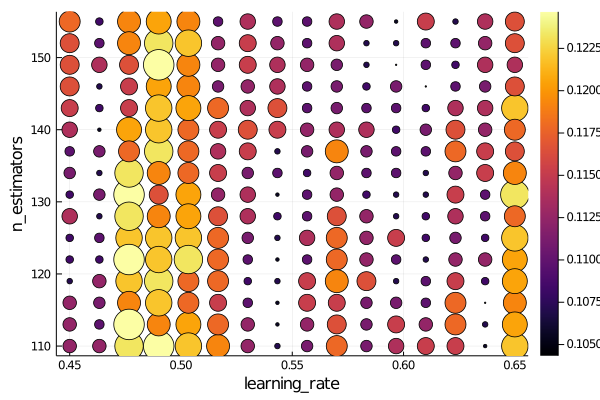

In [213]:
plot(self_tuning_boost)

In [214]:
best = fitted_params(self_tuning_boost)
best.best_model

AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 116,
    learning_rate = 0.6366666666666667,
    algorithm = "SAMME.R",
    random_state = 123) @781

In [215]:
best_loss = round(z.report.best_result.measurement[1],digits=5)

0.10434

In [216]:
best_n = best.best_model.n_estimators
best_lr = best.best_model.learning_rate

0.6366666666666667

In [217]:
fn = "Figures/Boost_MCC"
png(replace(fn,'.' => ','))

### Learning Curves

In [218]:
data_schedule, training_losses, valid_losses = learn_curve(best.best_model, X_stand[train,:], y[train], acc)

(d, train_metric, valid_metric) = (10, 1.0, 0.6283783783783784)
(d, train_metric, valid_metric) = (15, 1.0, 0.6283783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#

(d, train_metric, valid_metric) = (20, 1.0, 0.75)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (25, 1.0, 0.8108108108108109)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (30, 1.0, 0.7702702702702703)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (35, 1.0, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (40, 1.0, 0.7364864864864865)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (45, 1.0, 0.7094594594594594)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (50, 1.0, 0.777027027027027)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (55, 1.0, 0.8108108108108109)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (60, 1.0, 0.75)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (65, 1.0, 0.75)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (70, 1.0, 0.75)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (75, 1.0, 0.777027027027027)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (80, 1.0, 0.8040540540540541)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (85, 1.0, 0.7635135135135135)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (90, 1.0, 0.831081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (95, 1.0, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (100, 1.0, 0.8040540540540541)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (105, 1.0, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (110, 1.0, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (115, 1.0, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (120, 1.0, 0.777027027027027)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (125, 1.0, 0.8040540540540541)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (130, 1.0, 0.8040540540540541)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (135, 1.0, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (140, 1.0, 0.831081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (145, 1.0, 0.8108108108108109)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (150, 1.0, 0.7837837837837838)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (155, 1.0, 0.831081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (160, 1.0, 0.8108108108108109)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (165, 1.0, 0.8243243243243243)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (170, 1.0, 0.8108108108108109)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (175, 1.0, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (180, 1.0, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (185, 1.0, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (190, 1.0, 0.8243243243243243)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (195, 1.0, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (200, 1.0, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (205, 1.0, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (210, 1.0, 0.8243243243243243)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (215, 1.0, 0.7972972972972973)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (220, 1.0, 0.8243243243243243)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (225, 1.0, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (230, 1.0, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (235, 1.0, 0.8243243243243243)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (240, 1.0, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (245, 1.0, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (250, 1.0, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (255, 1.0, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (260, 1.0, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (265, 1.0, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (270, 1.0, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (275, 1.0, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (280, 1.0, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (285, 1.0, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (290, 1.0, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (295, 1.0, 0.8243243243243243)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (300, 1.0, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (305, 1.0, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (310, 1.0, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (315, 1.0, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (320, 1.0, 0.831081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (325, 1.0, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (330, 0.996969696969697, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (335, 0.9970149253731343, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (340, 0.9970588235294118, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (345, 0.9971014492753624, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (350, 0.9942857142857143, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (355, 0.9915492957746479, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (360, 0.9972222222222222, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (365, 0.9945205479452055, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (370, 0.9891891891891892, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (375, 0.9893333333333333, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (380, 0.9921052631578947, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (385, 0.9922077922077922, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (390, 0.9923076923076923, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (395, 0.9898734177215189, 0.8851351351351351)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (400, 0.9875, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (405, 0.9827160493827161, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (410, 0.9804878048780488, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (415, 0.9855421686746988, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (420, 0.9880952380952381, 0.8918918918918919)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (425, 0.9811764705882353, 0.8851351351351351)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (430, 0.9744186046511628, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (435, 0.9839080459770115, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (440, 0.9863636363636363, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (445, 0.9887640449438202, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (450, 0.9822222222222222, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (455, 0.9824175824175824, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (460, 0.9847826086956522, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (465, 0.9827956989247312, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (470, 0.9893617021276596, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (475, 0.9831578947368421, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (480, 0.9729166666666667, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (485, 0.9711340206185567, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (490, 0.9755102040816327, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (495, 0.9777777777777777, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (500, 0.964, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (505, 0.9702970297029703, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (510, 0.9666666666666667, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (515, 0.9728155339805825, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (520, 0.9711538461538461, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (525, 0.9733333333333334, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (530, 0.9754716981132076, 0.8851351351351351)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (535, 0.9757009345794393, 0.8986486486486487)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (540, 0.9740740740740741, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (545, 0.9669724770642202, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (550, 0.9690909090909091, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (555, 0.9657657657657658, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (560, 0.9642857142857143, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (565, 0.968141592920354, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (570, 0.9649122807017544, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (575, 0.9721739130434782, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (580, 0.9655172413793104, 0.8851351351351351)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (585, 0.9572649572649573, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (590, 0.9627118644067797, 0.8851351351351351)


(10:5:590, Any[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.9669724770642202, 0.9690909090909091, 0.9657657657657658, 0.9642857142857143, 0.968141592920354, 0.9649122807017544, 0.9721739130434782, 0.9655172413793104, 0.9572649572649573, 0.9627118644067797], Any[0.6283783783783784, 0.6283783783783784, 0.75, 0.8108108108108109, 0.7702702702702703, 0.8175675675675675, 0.7364864864864865, 0.7094594594594594, 0.777027027027027, 0.8108108108108109  …  0.8445945945945946, 0.8581081081081081, 0.8445945945945946, 0.8783783783783784, 0.8716216216216216, 0.8513513513513513, 0.8513513513513513, 0.8851351351351351, 0.8581081081081081, 0.8851351351351351])

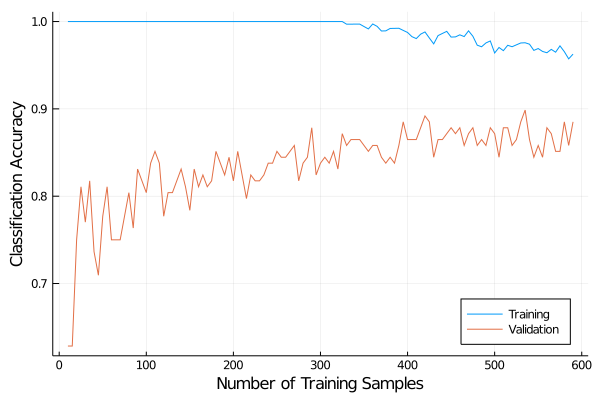

In [220]:
plot(data_schedule, training_losses, label="Training", legend=:bottomright)
plot!(data_schedule, valid_losses, label="Validation")
xlabel!("Number of Training Samples")
ylabel!("Classification Accuracy")

In [221]:
fn = "Figures/Boost_LC"
png(replace(fn,'.' => ','))

# Final Results

In [222]:
final_boost_model = best.best_model

AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 116,
    learning_rate = 0.6366666666666667,
    algorithm = "SAMME.R",
    random_state = 123) @781

In [223]:
Final_Boost = machine(final_boost_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=AdaBoostClassifier @781`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{AdaBoostClassifier} @166 trained 0 times.
  args: 
    1:	Source @089 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @541 ⏎ `AbstractArray{Multiclass{2},1}`


In [224]:
fit!(Final_Boost, rows=train, verbosity=2)

┌ Info: Training Machine{AdaBoostClassifier} @166.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{AdaBoostClassifier} @166 trained 1 time.
  args: 
    1:	Source @089 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @541 ⏎ `AbstractArray{Multiclass{2},1}`


In [225]:
ŷ2 = MLJ.predict(Final_Boost, X_stand[test,:]);

In [226]:
cross_entropy(ŷ2, y[test]) |> mean

0.648874327729276

In [227]:
acc(ŷ2, y[test])

0.8233438485804416

In [229]:
c = confusion_matrix(mode.(ŷ2), y[test])

┌ Warning: The classes are un-ordered,
│ using: negative='NRB' and positive='RB'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:83


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │     NRB     │     RB      │
├─────────────┼─────────────┼─────────────┤
│     NRB     │     183     │     29      │
├─────────────┼─────────────┼─────────────┤
│     RB      │     27      │     78      │
└─────────────┴─────────────┴─────────────┘


In [230]:
precision(c)

0.7428571428571429

In [231]:
recall(c)

0.7289719626168224

In [232]:
27/(27+183)

0.12857142857142856

In [233]:
29/(29+78)

0.27102803738317754

In [234]:
misclassification_rate(c)

0.17665615141955837